<a href="https://colab.research.google.com/github/pagand/NRC/blob/main/Feature/PCA_clustering_revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # Plotting 
import pandas as pd # Storing data convenieniently
import math
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/queenCsvOutAugmented.csv', index_col=None, skiprows=[1])
df = df.fillna(0)
print(df)

                  Dati  Time         CARGO  ...  WIND_SPEED_TRUE  Mode1  Trip
0        190830_000100   1.0  1.000000e+09  ...           8.2348      0     0
1        190830_000200   2.0  1.000000e+09  ...           4.9241      0     0
2        190830_000300   3.0  1.000000e+09  ...           6.1525      0     0
3        190830_000400   4.0  1.000000e+09  ...           4.6435      0     0
4        190830_000500   5.0  1.000000e+09  ...           6.6053      0     0
...                ...   ...           ...  ...              ...    ...   ...
1098848  210930_225300   0.0  0.000000e+00  ...           0.0000      0     0
1098849  210930_225400   0.0  0.000000e+00  ...           0.0000      0     0
1098850  210930_225500   0.0  0.000000e+00  ...           0.0000      0     0
1098851  210930_225600   0.0  0.000000e+00  ...           0.0000      0     0
1098852  210930_225700   0.0  0.000000e+00  ...           0.0000      0     0

[1098853 rows x 43 columns]


In [ ]:
df.head(5)

,Dati,Time,CARGO,CARGO_PAX,DEPTH,ENGINE_1_FLOWRATE,ENGINE_1_FLOWRATEA,ENGINE_1_FLOWRATEB,ENGINE_1_FLOWTEMPA,ENGINE_1_FLOWTEMPB,ENGINE_1_FUEL_CONSUMPTION,ENGINE_2_FLOWRATE,ENGINE_2_FLOWRATEA,ENGINE_2_FLOWRATEB,ENGINE_2_FLOWTEMPA,ENGINE_2_FLOWTEMPB,ENGINE_2_FUEL_CONSUMPTION,HEADING,LATITUDE,LONGITUDE,PAX,PITCH_1,PITCH_2,POWER_1,POWER_2,RATE_OF_TURN,SOG,SOG_SPEEDLOG_LONG,SOG_SPEEDLOG_TRANS,SPEED_1,SPEED_2,STW,THRUST_1,THRUST_2,TORQUE_1,TORQUE_2,TRACK_MADE_GOOD,WIND_ANGLE,WIND_SPEED,WIND_ANGLE_TRUE,WIND_SPEED_TRUE,Mode1,Trip
0,190830_000100,1.0,1.000000e+09,1.0,0.0050,-196.1073,2875.3389,2679.2317,30.6250,35.6000,172.6706,-321.9533,1224.3627,902.4094,30.7300,33.4533,278.6818,3.4,49.3771,-123.2715,0.0,65.67,75.2,907.6771,0.0,-0.0006,0.0117,0.0050,0.0017,840.5825,0.0,0.0283,173.4646,0.0,61.8693,0.0,181.2967,221.0,8.2265,44.3432,8.2348,0,0
1,190830_000200,2.0,1.000000e+09,1.0,0.0050,-188.3371,2911.7334,2723.3962,30.4967,35.6000,166.1199,-280.9333,1197.0101,916.0769,30.6033,33.3400,243.6363,3.3,49.3771,-123.2715,0.0,65.67,75.2,635.2236,0.0,0.0002,0.0150,0.0000,0.0050,818.9124,0.0,0.0467,118.5395,0.0,44.2674,0.0,166.5850,221.0,4.9133,44.1781,4.9241,0,0
2,190830_000300,3.0,1.000000e+09,1.0,0.0050,-196.6828,2932.1985,2735.5156,30.4000,35.6000,173.2781,-193.0025,1121.8485,928.8461,30.5183,33.2233,168.3220,3.3,49.3771,-123.2715,0.0,65.67,75.2,514.6831,0.0,-0.0004,0.0083,0.0000,0.0000,808.5920,0.0,0.0467,94.1722,0.0,36.4697,0.0,187.0533,203.0,6.1450,26.2657,6.1525,0,0
3,190830_000400,4.0,1.000000e+09,1.0,0.0051,-230.8546,2908.0278,2677.1733,30.3567,35.5200,202.3741,-157.9127,1089.2361,931.3233,30.4567,33.1033,138.2327,3.4,49.3771,-123.2715,0.0,65.67,75.2,518.9356,0.0,0.0008,0.2150,0.2033,0.0300,828.1191,0.0,0.1200,78.4188,0.0,35.9350,0.0,119.7333,209.0,4.4600,30.9895,4.6435,0,0
4,190830_000500,5.0,1.000000e+09,1.0,0.0084,-314.0331,2826.0166,2511.9834,30.2200,35.4333,273.6658,-366.3546,1272.7319,906.3774,30.3383,33.0933,316.9748,3.1,49.3771,-123.2715,0.0,65.67,75.2,623.5921,0.0,0.0386,3.7617,3.7533,0.2400,883.6942,0.0,3.3250,5.6234,0.0,40.4284,0.0,8.1100,217.0,3.2533,18.8790,6.6053,0,0


we can see that each data frame has 36 features

In [ ]:
df.describe()

,Time,CARGO,CARGO_PAX,DEPTH,ENGINE_1_FLOWRATE,ENGINE_1_FLOWRATEA,ENGINE_1_FLOWRATEB,ENGINE_1_FLOWTEMPA,ENGINE_1_FLOWTEMPB,ENGINE_1_FUEL_CONSUMPTION,ENGINE_2_FLOWRATE,ENGINE_2_FLOWRATEA,ENGINE_2_FLOWRATEB,ENGINE_2_FLOWTEMPA,ENGINE_2_FLOWTEMPB,ENGINE_2_FUEL_CONSUMPTION,HEADING,LATITUDE,LONGITUDE,PAX,PITCH_1,PITCH_2,POWER_1,POWER_2,RATE_OF_TURN,SOG,SOG_SPEEDLOG_LONG,SOG_SPEEDLOG_TRANS,SPEED_1,SPEED_2,STW,THRUST_1,THRUST_2,TORQUE_1,TORQUE_2,TRACK_MADE_GOOD,WIND_ANGLE,WIND_SPEED,WIND_ANGLE_TRUE,WIND_SPEED_TRUE,Mode1,Trip
count,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1098853.0,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06
mean,5.492310e+05,5.089974e+08,5.089974e-01,3.637230e-02,-2.453751e+02,1.256194e+03,1.010819e+03,1.924395e+01,2.328324e+01,2.140654e+02,-2.741245e+02,7.131971e+02,4.390725e+02,1.898040e+01,2.180652e+01,2.376400e+02,8.909150e+01,3.533385e+01,-8.846104e+01,0.0,1.383490e+02,1.076078e+02,1.233243e+03,7.327960e+02,9.019754e-04,5.580631e+00,-1.403739e+00,3.764228e-02,3.420233e+02,1.953898e+02,5.779013e+00,9.957183e+01,6.222436e+01,6.754817e+01,4.011101e+01,8.422158e+01,1.056974e+02,7.512768e+00,8.986728e+00,9.530172e+00,6.019276e-02,9.016220e-02
std,3.172117e+05,4.999023e+08,4.999023e-01,6.231481e-02,3.214044e+02,1.299367e+03,1.098965e+03,1.191029e+01,1.431874e+01,2.791447e+02,3.355051e+02,7.488985e+02,4.530809e+02,1.178061e+01,1.366574e+01,2.903338e+02,1.135852e+02,2.222929e+01,5.565282e+01,0.0,2.225639e+02,1.859808e+02,2.277044e+03,1.920742e+03,6.777741e-02,8.491588e+00,1.005452e+01,3.762701e-01,4.725427e+02,3.967517e+02,8.514711e+00,1.650055e+02,1.453012e+02,1.205084e+02,1.022846e+02,1.026417e+02,1.241056e+02,9.380587e+00,4.375043e+01,1.377239e+01,4.484261e-01,6.056937e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.142971e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.050410e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.239570e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.080900e+00,0.000000e+00,-2.162830e+01,-4.768300e+00,-1.750530e+03,-7.497173e+02,0.000000e+00,-4.588942e+02,-3.827733e+02,-3.817200e+00,-5.520900e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e+01,0.000000e+00,-1.000000e+00,-1.000000e+00
25%,2.745180e+05,0.000000e+00,0.000000e+00,0.000000e+00,-5.723538e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.167615e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.235161e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.515000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.492310e+05,1.000000e+09,1.000000e+00,5.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00,2.330000e+01,2.859500e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.275000e+01,2.621830e+01,0.000000e+00,5.600000e+00,4.927670e+01,-1.232715e+02,0.0,6.456980e+01,6.490930e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.033000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,2.996700e+00,0.000000e+00,2.855000e+00,0.000000e+00,0.000000e+00
75%,8.239440e+05,1.000000e+09,1.000000e+00,2.980000e-02,0.000000e+00,2.532998e+03,1.930087e+03,2.827670e+01,3.349830e+01,4.989663e+02,0.000000e+00,1.493105e+03,8.771270e+02,2.799330e+01,3.165000e+01,

In [ ]:
df2 = df.iloc[:, 3:]
df2.describe()

,CARGO_PAX,DEPTH,ENGINE_1_FLOWRATE,ENGINE_1_FLOWRATEA,ENGINE_1_FLOWRATEB,ENGINE_1_FLOWTEMPA,ENGINE_1_FLOWTEMPB,ENGINE_1_FUEL_CONSUMPTION,ENGINE_2_FLOWRATE,ENGINE_2_FLOWRATEA,ENGINE_2_FLOWRATEB,ENGINE_2_FLOWTEMPA,ENGINE_2_FLOWTEMPB,ENGINE_2_FUEL_CONSUMPTION,HEADING,LATITUDE,LONGITUDE,PAX,PITCH_1,PITCH_2,POWER_1,POWER_2,RATE_OF_TURN,SOG,SOG_SPEEDLOG_LONG,SOG_SPEEDLOG_TRANS,SPEED_1,SPEED_2,STW,THRUST_1,THRUST_2,TORQUE_1,TORQUE_2,TRACK_MADE_GOOD,WIND_ANGLE,WIND_SPEED,WIND_ANGLE_TRUE,WIND_SPEED_TRUE,Mode1,Trip
count,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1098853.0,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06
mean,5.089974e-01,3.637230e-02,-2.453751e+02,1.256194e+03,1.010819e+03,1.924395e+01,2.328324e+01,2.140654e+02,-2.741245e+02,7.131971e+02,4.390725e+02,1.898040e+01,2.180652e+01,2.376400e+02,8.909150e+01,3.533385e+01,-8.846104e+01,0.0,1.383490e+02,1.076078e+02,1.233243e+03,7.327960e+02,9.019754e-04,5.580631e+00,-1.403739e+00,3.764228e-02,3.420233e+02,1.953898e+02,5.779013e+00,9.957183e+01,6.222436e+01,6.754817e+01,4.011101e+01,8.422158e+01,1.056974e+02,7.512768e+00,8.986728e+00,9.530172e+00,6.019276e-02,9.016220e-02
std,4.999023e-01,6.231481e-02,3.214044e+02,1.299367e+03,1.098965e+03,1.191029e+01,1.431874e+01,2.791447e+02,3.355051e+02,7.488985e+02,4.530809e+02,1.178061e+01,1.366574e+01,2.903338e+02,1.135852e+02,2.222929e+01,5.565282e+01,0.0,2.225639e+02,1.859808e+02,2.277044e+03,1.920742e+03,6.777741e-02,8.491588e+00,1.005452e+01,3.762701e-01,4.725427e+02,3.967517e+02,8.514711e+00,1.650055e+02,1.453012e+02,1.205084e+02,1.022846e+02,1.026417e+02,1.241056e+02,9.380587e+00,4.375043e+01,1.377239e+01,4.484261e-01,6.056937e-01
min,0.000000e+00,0.000000e+00,-1.142971e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.050410e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.239570e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.080900e+00,0.000000e+00,-2.162830e+01,-4.768300e+00,-1.750530e+03,-7.497173e+02,0.000000e+00,-4.588942e+02,-3.827733e+02,-3.817200e+00,-5.520900e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e+01,0.000000e+00,-1.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,-5.723538e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.167615e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.235161e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.515000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,5.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00,2.330000e+01,2.859500e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.275000e+01,2.621830e+01,0.000000e+00,5.600000e+00,4.927670e+01,-1.232715e+02,0.0,6.456980e+01,6.490930e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.033000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,2.996700e+00,0.000000e+00,2.855000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,2.980000e-02,0.000000e+00,2.532998e+03,1.930087e+03,2.827670e+01,3.349830e+01,4.989663e+02,0.000000e+00,1.493105e+03,8.771270e+02,2.799330e+01,3.165000e+01,5.347830e+02,2.326000e+02,4.937710e+01,0.000000e+00,0.0,7.069770e+01,7.083750e+01,9.772078e+02,7.324000e-01,0.000000e+00,1.785170e+01,0.000000e+00,0.000000e+00,8.671656e+02,0.000000e+00,1.78800

one way to find corrolated data would be to check the correlation of some of the features and hope that some of them are repeats (can be removed). Let’s try it out and display the correlation matrix.

In [ ]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Time,CARGO,CARGO_PAX,DEPTH,ENGINE_1_FLOWRATE,ENGINE_1_FLOWRATEA,ENGINE_1_FLOWRATEB,ENGINE_1_FLOWTEMPA,ENGINE_1_FLOWTEMPB,ENGINE_1_FUEL_CONSUMPTION,ENGINE_2_FLOWRATE,ENGINE_2_FLOWRATEA,ENGINE_2_FLOWRATEB,ENGINE_2_FLOWTEMPA,ENGINE_2_FLOWTEMPB,ENGINE_2_FUEL_CONSUMPTION,HEADING,LATITUDE,LONGITUDE,PAX,PITCH_1,PITCH_2,POWER_1,POWER_2,RATE_OF_TURN,SOG,SOG_SPEEDLOG_LONG,SOG_SPEEDLOG_TRANS,SPEED_1,SPEED_2,STW,THRUST_1,THRUST_2,TORQUE_1,TORQUE_2,TRACK_MADE_GOOD,WIND_ANGLE,WIND_SPEED,WIND_ANGLE_TRUE,WIND_SPEED_TRUE,Mode1,Trip
Time,1.000000,-0.369262,-0.369262,0.088601,-0.095357,0.157798,0.158685,0.315232,0.304591,0.094806,-0.140011,0.165691,0.170194,0.316452,0.300221,0.138922,0.125419,0.207481,-0.207622,nan,-0.231320,-0.248125,0.104862,0.020790,-0.002501,0.092652,-0.052337,0.047579,0.142580,0.040983,0.087388,0.114505,0.031369,0.110493,0.024318,-0.319275,0.124465,0.095320,0.035041,0.103505,0.052513,0.089720
CARGO,-0.369262,1.000000,1.000000,0.154810,-0.205917,0.262042,0.249604,0.449068,0.457619,0.207907,-0.201504,0.240895,0.248963,0.443964,0.442156,0.203053,0.197226,0.505425,-0.505170,nan,0.610525,0.568274,0.139414,0.093122,0.013071,0.172574,-0.038955,0.006544,0.193518,0.109760,0.186439,0.156380,0.093290,0.141947,0.092699,0.805891,0.257922,0.241538,0.067797,0.205169,0.033112,0.025733
CARGO_PAX,-0.369262,1.000000,1.000000,0.154810,-0.205917,0.262042,0.249604,0.449068,0.457619,0.207907,-0.201504,0.240895,0.248963,0.443964,0.442156,0.203053,0.197226,0.505425,-0.505170,nan,0.610525,0.568274,0.139414,0.093122,0.013071,0.172574,-0.038955,0.006544,0.193518,0.109760,0.186439,0.156380,0.093290,0.141947,0.092699,0.805891,0.257922,0.241538,0.067797,0.205169,0.033112,0.025733
DEPTH,0.088601,0.154810,0.154810,1.000000,-0.798815,0.485071,0.339904,0.359180,0.457502,0.798639,-0.781136,0.667136,0.524282,0.373834,0.489548,0.780822,0.752348,0.366376,-0.368384,nan,0.343364,0.210271,0.587207,0.441301,-0.002880,0.843768,-0.186196,0.027319,0.376337,0.265984,0.834939,0.555253,0.431609,0.579946,0.434364,0.023373,0.129519,0.733329,0.113198,0.684900,0.174615,0.141137
ENGINE_1_FLOWRATE,-0.095357,-0.205917,-0.205917,-0.798815,1.000000,-0.699113,-0.534139,-0.462709,-0.583665,-0.999920,0.990639,-0.891665,-0.740270,-0.484293,-0.621600,-0.990460,-0.901007,-0.476609,0.479526,nan,-0.456302,-0.351054,-0.708182,-0.548404,-0.008166,-0.955542,0.182472,-0.123312,-0.574950,-0.419138,-0.944474,-0.704213,-0.557448,-0.704334,-0.543546,-0.062093,-0.181017,-0.863458,-0.135186,-0.783012,-0.176806,-0.161121
ENGINE_1_FLOWRATEA,0.157798,0.262042,0.262042,0.485071,-0.699113,1.000000,0.977892,0.554570,0.649386,0.703153,-0.761784,0.932951,0.977978,0.582918,0.666322,0.763522,0.692276,0.601383,-0.604053,nan,0.506611,0.439376,0.497749,0.336716,0.014177,0.583347,-0.130684,0.092818,0.732399,0.485774,0.572912,0.569785,0.388483,0.520481,0.349655,0.186608,0.331871,0.583356,0.098281,0.532790,0.124815,0.145149
ENGINE_1_FLOWRATEB,0.158685,0.249604,0.249604,0.339904,-0.534139,0.977892,1.000000,0.520375,0.597105,0.538939,-0.610975,0.842302,0.939817,0.547579,0.606036,0.613083,0.555006,0.571659,-0.573962,nan,0.465543,0.416829,0.381400,0.237730,0.014374,0.410265,-0.101149,0.073679,0.697805,0.451776,0.401163,0.467734,0.296293,0.409402,0.254450,0.202477,0.339449,0.437206,0.076667,0.400947,0.095866,0.124496
ENGINE_1_FLOWTEMPA,0.315232,0.449068,0.449068,0.359180,-0.462709,0.554570,0.520375,1.000000,0.982859,0.463517,-0.498881,0.559838,0.555938,0.999053,0.978439,0.498507,0.472888,0.922840,-0.922927,nan,0.290726,0.284087,0.325791,0.243839,0.006376,0.403402,-0.078609,0.067219,0.424143,0.311634,0.414770,0.360853,0.274218,0.336135,0.249617,0.413738,0.499087,0.466680,0.122241,0.400295,0.074987,0.076620
ENGINE_1_FLOWTEMPB,0.304591,0.457619,0.457619,0.457502,-0.583665,0.649386,0.597105,0.982859,1.000000,0.584908,-0.618719,0.672942,0.654148,0.986702,0.995586,0.618703,0.585865,0.926191,-0.926814,nan,0.357243,0.329515,0.415281,0.303080,0.009511,0.519437,-0.107488,0.074550,0.504333,0.358236,0.529852,0.449544,0.336263,0.4

In [ ]:
del df['PAX']
del df['CARGO_PAX']
del df['ENGINE_1_FLOWRATEB']
del df['ENGINE_1_FLOWTEMPB']
del df['ENGINE_2_FLOWRATEB']
del df['ENGINE_2_FLOWTEMPB']
del df['CARGO']

Text(0, 0.5, 'correlation with Fuel consumption ')

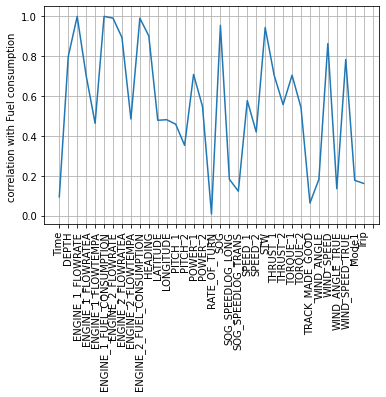

In [ ]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')
correlation["ENGINE_1_FUEL_CONSUMPTION"].abs().plot()
plt.xticks([i for i in range(0,36)],correlation.index,rotation=90)
plt.grid()
plt.ylabel('correlation with Fuel consumption ')



# Grouping the data points based on their direction 

So let's seperate the H-N


In [ ]:
df_HN = df[df["Trip"] == 1]
df_HN.head

<bound method NDFrame.head of                   Dati       Time   DEPTH  ...  WIND_SPEED_TRUE  Mode1  Trip
375      190830_061600      376.0  0.0182  ...           2.8001      0     1
376      190830_061700      377.0  0.0199  ...           1.6319      0     1
377      190830_061800      378.0  0.0225  ...           3.8762      0     1
378      190830_061900      379.0  0.0201  ...           2.8790      0     1
379      190830_062000      380.0  0.0192  ...           4.1110      0     1
...                ...        ...     ...  ...              ...    ...   ...
1098652  210930_193700  1098653.0  0.0052  ...           6.5450      0     1
1098653  210930_193800  1098654.0  0.0054  ...           5.7846      0     1
1098654  210930_193900  1098655.0  0.0055  ...           5.3555      0     1
1098655  210930_194000  1098656.0  0.0065  ...           7.2216      0     1
1098656  210930_194100  1098657.0  0.0042  ...          14.4785      0     1

[255569 rows x 36 columns]>

# Approach 1: Direct clustering with effective features
These are the effective features: Depth,Engine1_flowrate, heading, pitch1-2,SOG,lattitde,longitude,speed1-2,STW,thrust1-2,wind_angle,wind_speed, and Engine1_fuel_consumption

Step 1: Select the features and Normalize data

In [ ]:
df_HN1 = df_HN[["ENGINE_1_FUEL_CONSUMPTION", "SOG","DEPTH","ENGINE_1_FLOWRATE","HEADING",
                   "LATITUDE","LONGITUDE","PITCH_1","PITCH_2","SPEED_1","SPEED_2",
                  "THRUST_1","THRUST_2" ,"WIND_ANGLE","WIND_SPEED","STW"]]
std_features = StandardScaler().fit_transform(df_HN1) # normalizing the data 

Step 2: compute innertia

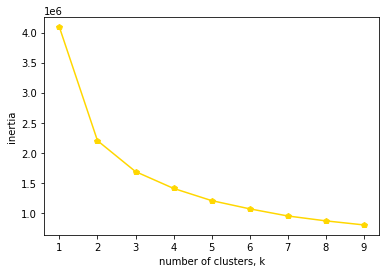

In [ ]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(std_features)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks()
plt.show()

Step 3: compute the cluster for the right number of class

Text(0, 0.5, 'SOG')

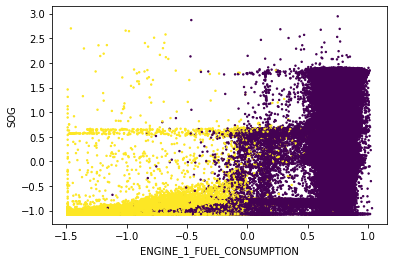

In [ ]:
model = KMeans(n_clusters=2)
model.fit(std_features)

labels = model.predict(std_features)
plt.scatter(std_features[:,1], std_features[:,2], c=labels,s=2)
plt.xlabel("ENGINE_1_FUEL_CONSUMPTION")
plt.ylabel("SOG")


Step 4: show effectiveness of the approach

0.14515845035978542
0.1240957858910604


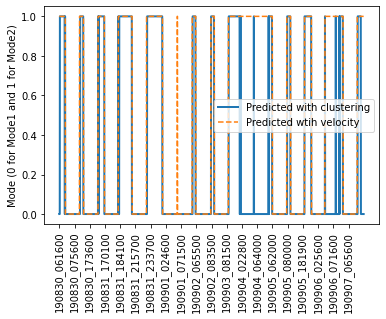

In [ ]:
fig , ax = plt.subplots(1,1)
ax.plot(df_HN.iloc[:2000,0],labels[:2000,], linewidth=2)
ax.plot(df_HN.iloc[:2000,0],-(df_HN.iloc[:2000,34]-1),ls=('dashed')) #plot Mode1 augmented feature
time = df_HN.iloc[:2000,0]
ax.set_xticks(time[::100])
ax.set_xticklabels(time[::100], rotation=90)
plt.legend(['Predicted with clustering', 'Predicted wtih velocity'])
plt.ylabel("Mode (0 for Mode1 and 1 for Mode2)")

t = abs(labels - (-(df_HN.iloc[:,34]-1)))
print(t.mean())
print(t.var())


# Approach 2: Dimonsion reduction using PCA 
**Step 1: Normalize data**


The normalization follows this formula = (value-mean)/std

In [ ]:
std_df = StandardScaler().fit_transform(df_HN.iloc[:,2:]) # normalizing the data 
df_HN.shape

(255569, 36)

**Step 2: Principle component**


Sci-kit learn makes it very easy to get the principal components
there are 34 features

In [ ]:
pca = PCA(n_components=34)
principalComponents = pca.fit_transform(std_df)

A PC is a linear combination of the variables such that they have no correlation with each other (they are orthogonal) and that most of the information is squeezed into the first few PCs. In this case, “information” is the variance.

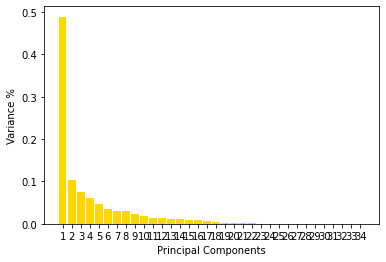

In [ ]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

As we see, most of the variance is put in the first component. What is left is put in component 2, then component 3, etc.

Now that we have the intuition, let’s proceed with the implementation. Let’s just plot the first 2.

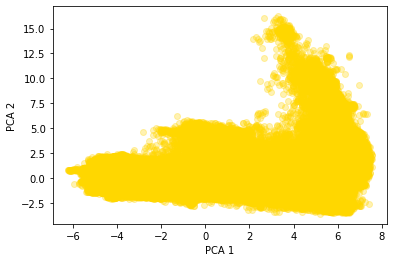

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


PCA has helped us to reduce the dimension of our data and we were able to make this nice plot. Let's assume 6 PCs (PC1-PC6)

Let's check what are the PCA loadings since 
PC1 = w11 X1+W12 X2+ ...+W1n Xn

---



In [ ]:
loadings = pd.DataFrame(pca.components_.T[:,:6], columns=['PC1', 'PC2','PC3','PC4','PC5','PC6'],index=df_HN.iloc[0,2:].index)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
DEPTH,-0.179704,-0.011854,-0.018805,-0.038497,-0.104743,0.034202
ENGINE_1_FLOWRATE,0.240063,-0.037558,0.062225,-0.054090,-0.007238,-0.060162
ENGINE_1_FLOWRATEA,0.190409,-0.089715,0.051428,-0.038512,0.002129,-0.047887
ENGINE_1_FLOWTEMPA,-0.024142,0.304453,0.394660,-0.158339,0.035080,0.420631
ENGINE_1_FUEL_CONSUMPTION,-0.240041,0.035284,-0.065641,0.055285,0.006269,0.057098
ENGINE_2_FLOWRATE,0.238484,-0.062430,0.020956,-0.037189,-0.013692,-0.075049
ENGINE_2_FLOWRATEA,-0.227466,0.081128,-0.041119,0.043383,0.002290,0.059603
ENGINE_2_FLOWTEMPA,-0.022278,0.304774,0.394724,-0.158603,0.035136,0.421225
ENGINE_2_FUEL_CONSUMPTION,-0.238551,0.059760,-0.024963,0.038709,0.012837,0.071428
HEADING,-0.186364,0.047482,-0.120501,-0.049997,0.030818,0.122345


**Loadings Matrix**
Another useful way to interpret PCA is by computing the correlations between the original variable and the principal components.
Here each entry of the matrix contains the correlation between the original variable and the principal component. For example the original variable fuel consumption engine 1 has corrolation equal to -0.964433 to the first PC.

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings[:,:6], columns=['PC1', 'PC2','PC3','PC4','PC5','PC6'], index=df_HN.iloc[0,2:].index)
loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6
DEPTH,-0.721990,-0.022013,-0.029435,-0.054268,-0.131754,0.036392
ENGINE_1_FLOWRATE,0.964495,-0.069744,0.097399,-0.076249,-0.009104,-0.064014
ENGINE_1_FLOWRATEA,0.765000,-0.166599,0.080499,-0.054289,0.002677,-0.050953
ENGINE_1_FLOWTEMPA,-0.096994,0.565365,0.617748,-0.223205,0.044127,0.447562
ENGINE_1_FUEL_CONSUMPTION,-0.964404,0.065521,-0.102746,0.077934,0.007885,0.060754
ENGINE_2_FLOWRATE,0.958151,-0.115932,0.032802,-0.052424,-0.017223,-0.079855
ENGINE_2_FLOWRATEA,-0.913883,0.150654,-0.064363,0.061156,0.002881,0.063419
ENGINE_2_FLOWTEMPA,-0.089507,0.565961,0.617850,-0.223577,0.044197,0.448195
ENGINE_2_FUEL_CONSUMPTION,-0.958420,0.110974,-0.039073,0.054566,0.016148,0.076002
HEADING,-0.748750,0.088174,-0.188616,-0.070480,0.038766,0.130179


Text(0, 0.5, 'correlation with PC1 ')

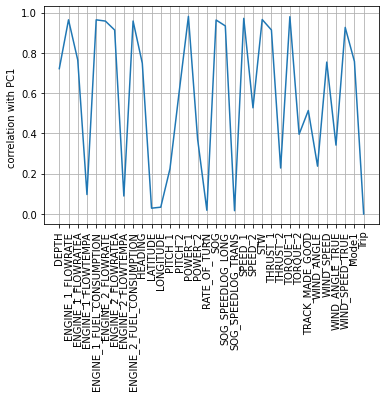

In [ ]:
loading_matrix["PC1"].abs().plot()
plt.xticks([i for i in range(0,34)],correlation.index[1:],rotation=90)
plt.grid()
plt.ylabel("correlation with PC1 ")


**Step 3: computing inertia **


To make the clusters more apparent, let’s use the K-means clustering algorithm to color-code them. I don’t want this post to get too heavy so I won’t be explaining the intuition behind this one. let's use inertia to help us with number of clusters.

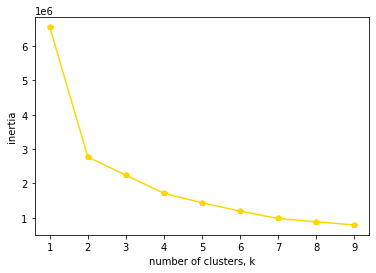

In [ ]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:5])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks()
plt.show()

Typically, we look at these inertia plots to find the elbow point. In our case, it looks like the elbow occurs with 4 clusters, so we will proceed with that.


So, let’s create our final model with 2 clusters on PC1 to PC6:



**Step 4: Clustering: K-means **


We use the first 5 elements of PC's to create 2 clusters

Text(0, 0.5, 'PC2')

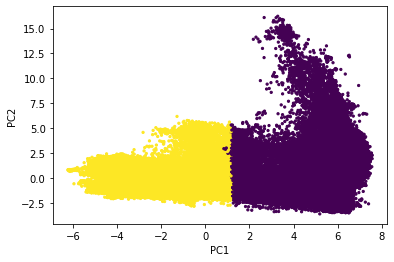

In [ ]:
model = KMeans(n_clusters=2)
model.fit(PCA_components.iloc[:,:5])

labels = model.predict(PCA_components.iloc[:,:5])
plt.scatter(PCA_components[0], PCA_components[1], c=labels,s=5)
plt.xlabel('PC1')
plt.ylabel('PC2')


0.13430423877700348
0.11626706515773497


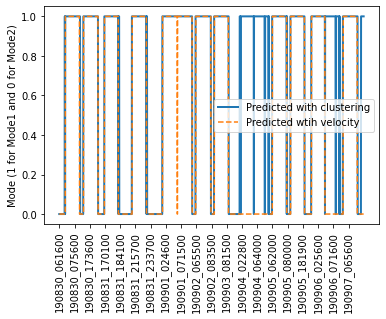

In [ ]:
fig , ax = plt.subplots(1,1)
ax.plot(df_HN.iloc[:2000,0],labels[:2000,], linewidth=2)
ax.plot(df_HN.iloc[:2000,0],df_HN.iloc[:2000,34],ls=('dashed')) #plot Mode1 augmented feature
time = df_HN.iloc[:2000,0]
ax.set_xticks(time[::100])
ax.set_xticklabels(time[::100], rotation=90)
plt.legend(['Predicted with clustering', 'Predicted wtih velocity'])
plt.ylabel("Mode (1 for Mode1 and 0 for Mode2)")

t = abs(labels - (df_HN.iloc[:,34]))
print(t.mean())
print(t.var())